<a href="https://colab.research.google.com/github/tedycahyanaa/DataVisualitation/blob/main/Uts_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
ls

heart.csv  kaggle.json  __notebook_source__.ipynb  o2Saturation.csv


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
# Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Importing the dataset
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
# Check for null values in dataset
df.isnull().mean()*100

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

In [15]:
# Assigning X and y values for the dataset
X = df.loc[:,df.columns!='CreditCard']
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0


In [16]:
y = df['CreditCard']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: CreditCard, dtype: int64

In [17]:
# Splitting Train and Test values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# import svc
from sklearn.svm import SVC

# Creating a instance
classifier = SVC(kernel='rbf',random_state=None)

# Fitting the model
classifier.fit(X_train, y_train)

SVC()

In [20]:
classifier.intercept_

array([-0.50438012])

In [21]:
classifier.n_support_

array([1305,  946], dtype=int32)

In [22]:
classifier.support_vectors_

array([[-0.0447986 , -1.24555234, -1.31124781, ..., -0.35207432,
        -0.25072019, -1.22038168],
       [ 0.22074192, -1.07063978, -1.13628813, ...,  2.8403094 ,
        -0.25072019, -1.22038168],
       [-0.60777223, -0.28353326, -0.1740099 , ...,  2.8403094 ,
        -0.25072019, -1.22038168],
       ...,
       [-1.01821606,  0.67848582,  0.7007885 , ..., -0.35207432,
        -0.25072019,  0.81941578],
       [ 0.19716913, -1.59537747, -1.48620749, ..., -0.35207432,
        -0.25072019,  0.81941578],
       [ 0.75251628, -1.15809606, -1.13628813, ..., -0.35207432,
        -0.25072019,  0.81941578]])

In [23]:
# Predicting the values
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[2457   16]
 [ 867  160]]
[[1048    9]
 [ 371   72]]


In [25]:
# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(accuracy_train)

0.7477142857142857


In [26]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.7466666666666667


In [27]:
# Correlation
c = df.corr()
print(c)

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702

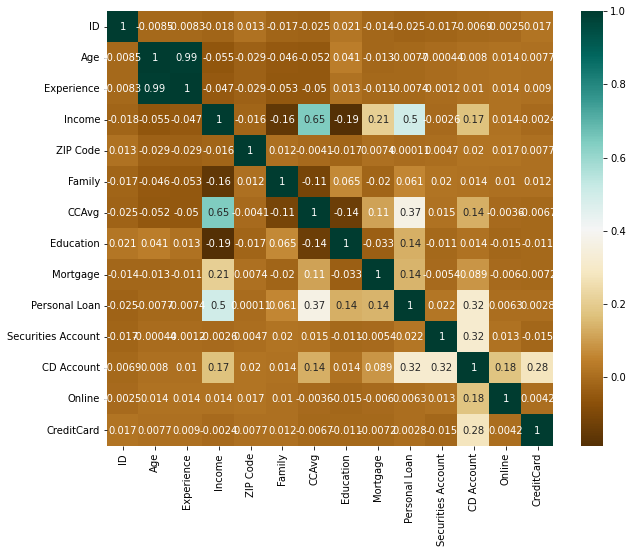

In [28]:
# Heat map
plt.figure(figsize=(10,8))
sns.heatmap(c,cmap='BrBG',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


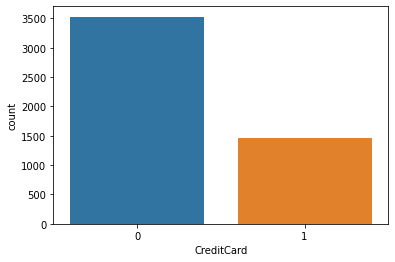

In [29]:
# Creditcard count
sns.countplot(df['CreditCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


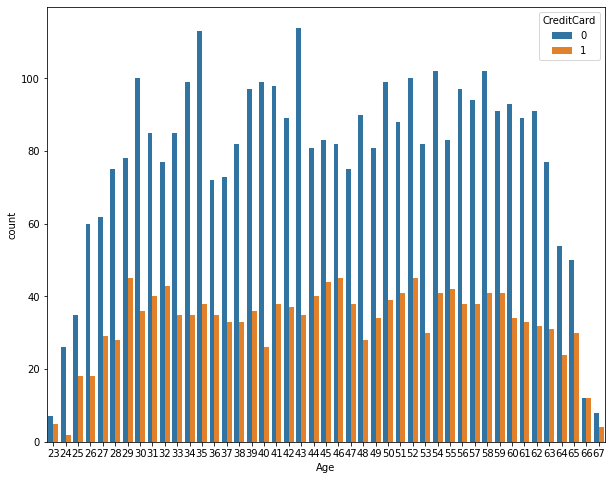

In [30]:
# Credit card issue according to age
plt.figure(figsize=(10,8))
sns.countplot(df['Age'],hue=df['CreditCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


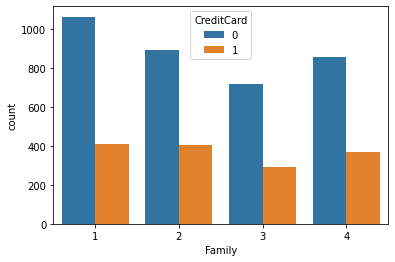

In [33]:
#Credit card issue according to Family members
sns.countplot(df['Family'],hue=df['CreditCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


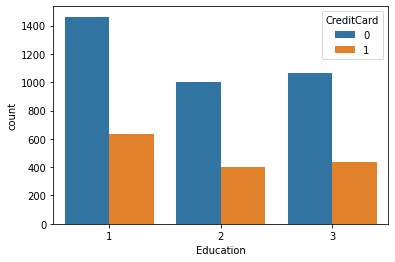

In [34]:
# Credit card issue according to Education
sns.countplot(df['Education'],hue=df['CreditCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


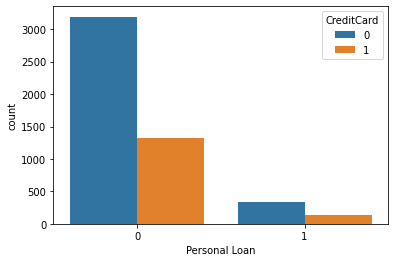

In [35]:
# Credit card issue according to customer's Personal Loan
sns.countplot(df['Personal Loan'],hue=df['CreditCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


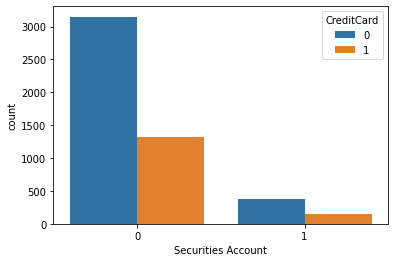

In [36]:
# Credit card issue according to customer's Securities Account
sns.countplot(df['Securities Account'],hue=df['CreditCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


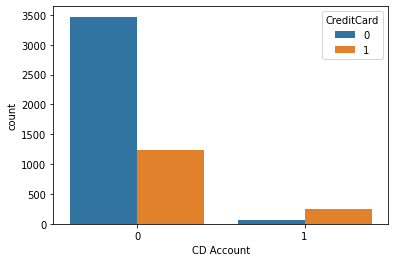

In [38]:
# Credit card issue according to customer's CD Account
sns.countplot(df['CD Account'],hue=df['CreditCard'])
